<a href="https://colab.research.google.com/github/Sabique-Islam/ML-Insights/blob/main/Flood_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import precision_recall_curve, auc
warnings.simplefilter("ignore")

In [23]:
df= pd.read_csv('/content/kerala.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [24]:
df.drop(df.columns[[0]], axis=1, inplace=True)  # axis=1(column), axis=0(rows)

In [25]:
df.head() # removed SUBDIVISION column due to-  ValueError: could not convert string to float: 'KERALA'

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


# info()

- Shows the data type of each column, number of columns, memory usage, and the number of records in the dataset.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              118 non-null    int64  
 1   JAN               118 non-null    float64
 2   FEB               118 non-null    float64
 3   MAR               118 non-null    float64
 4   APR               118 non-null    float64
 5   MAY               118 non-null    float64
 6   JUN               118 non-null    float64
 7   JUL               118 non-null    float64
 8   AUG               118 non-null    float64
 9   SEP               118 non-null    float64
 10  OCT               118 non-null    float64
 11  NOV               118 non-null    float64
 12  DEC               118 non-null    float64
 13   ANNUAL RAINFALL  118 non-null    float64
 14  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 14.0+ KB


# shape
- Displays the number of records and columns.

In [27]:
df.shape

(118, 15)

# describe()
- Summarizes the dataset’s statistical properties, such as count, mean, min, and max.

In [28]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


# replace
- In order to train a predictive model, we need the values of our target output to be 0 & 1.
- So, replacing values in the Floods column (YES, NO) with (1, 0).

In [33]:
df['FLOODS'].replace(['YES', 'NO'], [1,0], inplace=True) # inplace=True means the chnage is permanent
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


# corr()
- Displays the correlation between different variables in the dataset.

In [31]:
df.corr() #make sure no strings are there in the dataset

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048,-0.202548
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648,0.145313
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457,-0.035730
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103,0.086739
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358,0.034392
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723,0.242813
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407,0.442531
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990,0.442774
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036,0.286690
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344,0.376385


- The closer to 1, the stronger the correlation between these variables.

- A -ve sign means that these 2 variables are negatively correlated, i.e. one decreases with increasing the other and vice versa.

# Feature Selection
- Selecting the most influential columns to train the model.
- Using **SelectKBest** library to run a chi-squared statistical test and select the top 4 (choose accordingly) features that are most related to floods.

## [a:,b:c]

- a: no. of rows included, if a=null (all rows are included).
- After comma, denotes for columns.
- b and c :  columns from index b to c-1


In [34]:
from sklearn.feature_selection import SelectKBest, chi2

In [37]:
X = df.iloc[:,0:13]  # integer-location based indexing
X

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1


In [38]:
Y = df.iloc[:,-1]
Y # target output (in this case: floods) 1: True, 0: False

,FLOODS
0,1
1,1
2,1
3,1
4,0
...,...
113,1
114,0
115,0
116,0


In [39]:
best_features= SelectKBest(score_func=chi2, k=4) #selecting top 4 features
fit = best_features.fit(X,Y)

In [40]:
df_scores = pd.DataFrame(fit.scores_) # creating dataframes for feature and score of each feature
df_columns = pd.DataFrame(X.columns)

In [41]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score') # Top 4 features are JULY, JUNE, SEP, AUGUST

,Features,Score
4,APR,2.498771
2,FEB,2.571626
0,YEAR,2.866463
12,DEC,11.609546
10,OCT,12.650485
3,MAR,21.696518
1,JAN,48.413088
11,NOV,284.674615
5,MAY,656.812145
8,AUG,739.975818


In [43]:
X= df[['SEP', 'JUN', 'JUL', 'AUG']]
X

,SEP,JUN,JUL,AUG
0,197.7,824.6,743.0,357.5
1,491.6,390.9,1205.0,315.8
2,341.8,558.6,1022.5,420.2
3,222.7,1098.2,725.5,351.8
4,217.2,850.2,520.5,293.6
...,...,...,...,...
113,298.8,454.4,677.8,733.9
114,292.9,563.6,406.0,252.2
115,173.2,522.2,412.3,325.5
116,209.5,498.5,319.6,531.8


In [44]:
Y= df[['FLOODS']]
Y

,FLOODS
0,1
1,1
2,1
3,1
4,0
...,...
113,1
114,0
115,0
116,0


### Training set (X_train, y_train)
-  Used to train the model.

### Testing set (X_test, y_test)
-  Used to evaluate model performance.

### test_size=0.4
- Means 40% of the data goes into the test set, and 60% goes into training.
- More training data = better model learning, but we need enough test data to check performance.

**By default, train_test_split() shuffle data randomly each time the code runs, which can lead to different train-test splits on every execution.**

- *Solution:* random_state=100

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100) # splitting the dataset into training and test datasets

In [46]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

       SEP     JUN     JUL    AUG
84   117.6   828.7   388.9  315.3
85   235.4   597.9   324.8  340.3
37   223.2   681.6   648.6  287.9
45   199.4   919.0   671.7  695.6
97   517.6   732.5   641.4  371.8
26   335.6   720.2   888.2  315.0
101   99.0   503.1   318.7  438.2
112  318.6  1042.7   830.2  369.7
21   222.4   663.1  1025.1  320.6
33    48.4   852.9   415.0  337.2
11   136.8   948.2   833.6  534.4
46   394.5   556.1   669.3  739.6
96   292.2   544.2   970.5  536.0
25   322.7   563.9   885.2  536.0
32   469.7   859.3   773.4  479.5
99   195.8   633.8   343.2  566.5
108  326.5   438.2   924.9  269.3
51    57.4   576.7   430.0  413.6
29   411.5   633.1   401.7  273.4
64   150.1   597.7   465.1  296.1
28   268.9   946.6   844.0  293.9
90    48.5  1096.1   905.5  465.5
89   103.3   528.6   635.4  370.8
54   438.5   782.4   392.8  236.0
35   286.7   620.8   672.1  367.9
43   155.0   498.9   614.1  230.7
73   383.6   266.9  1004.2  533.6
80   376.6   912.4   489.8  495.6
36   139.8   4

# Evaluation

- Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
- Recall measures the model’s ability to correctly predict the true positive values.
- Precision is the ratio of true positives to the sum of both true and false positives.
- F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
Support is the number of actual occurrences of each class in the dataset.

In [52]:
from sklearn import metrics
from sklearn.metrics import classification_report

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test, y_pred, zero_division=1))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=1))

print(".",metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.8958333333333334
Recall:  0.8846153846153846
Precision: 0.92
.               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.92      0.88      0.90        26

    accuracy                           0.90        48
   macro avg       0.89      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48



---
#Damn

- Accuracy: 89.5%
- Recall: 88.%
- Precision: 92%

---

### **Class 0:**

- **Precision**: 0.87  
  87% of instances predicted as class 0 are actually class 0.

- **Recall**: 0.91  
  91% of actual class 0 instances are correctly predicted as class 0.

- **F1-Score**: 0.89  
  A balanced metric between precision and recall, indicating a good tradeoff between the two.

---

### **Class 1:**

- **Precision**: 0.92  
  92% of instances predicted as class 1 are actually class 1.

- **Recall**: 0.88  
  88% of actual class 1 instances are correctly predicted as class 1.

- **F1-Score**: 0.90  
  A good balance between precision and recall, slightly favoring precision.
---


In [53]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

In [54]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [55]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

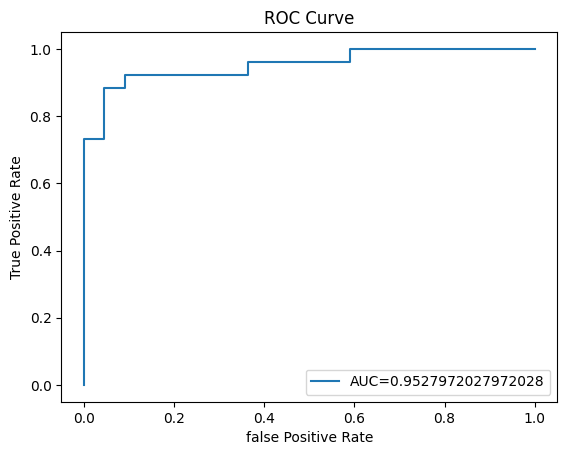

In [56]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

### AUC=0.952 (best case, AUC=1)

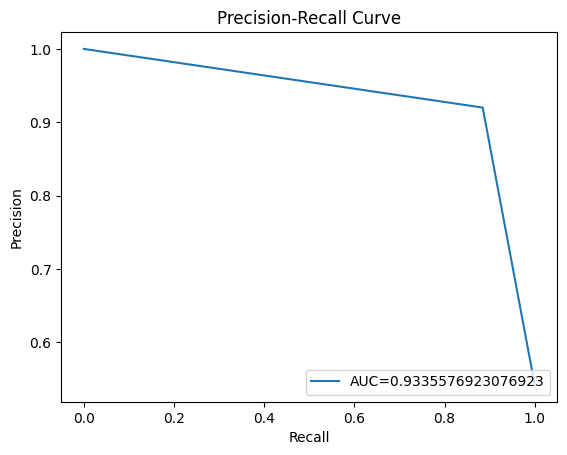

In [58]:

precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label="AUC=" + str(pr_auc))
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=4)

plt.show()

AUC=0.93 for Precison-Recall Curve (GG)